# Task 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
weather = pd.read_csv("D:\Data Science\Course 11\DS3_C1_S2_Weather_Data_Practice.csv")
weather.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
weather.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [3]:
# Task 1.2 : Rolling the average

In [9]:
lags = 3
moving_avg = weather.rolling(window = lags).mean()

In [10]:
print(moving_avg.head(20))

                 Temp
Date                 
1981-01-01        NaN
1981-01-02        NaN
1981-01-03  19.133333
1981-01-04  17.100000
1981-01-05  16.400000
1981-01-06  15.400000
1981-01-07  15.800000
1981-01-08  16.333333
1981-01-09  18.333333
1981-01-10  19.733333
1981-01-11  19.333333
1981-01-12  16.500000
1981-01-13  15.400000
1981-01-14  17.166667
1981-01-15  21.066667
1981-01-16  22.400000
1981-01-17  22.100000
1981-01-18  22.033333
1981-01-19  21.033333
1981-01-20  19.333333


In [11]:
df_ts = pd.DataFrame({'actual' : weather["Temp"], 'ma': moving_avg['Temp']})
print(df_ts)


            actual         ma
Date                         
1981-01-01    20.7        NaN
1981-01-02    17.9        NaN
1981-01-03    18.8  19.133333
1981-01-04    14.6  17.100000
1981-01-05    15.8  16.400000
...            ...        ...
1990-12-27    14.0  13.833333
1990-12-28    13.6  14.066667
1990-12-29    13.5  13.700000
1990-12-30    15.7  14.266667
1990-12-31    13.0  14.066667

[3650 rows x 2 columns]


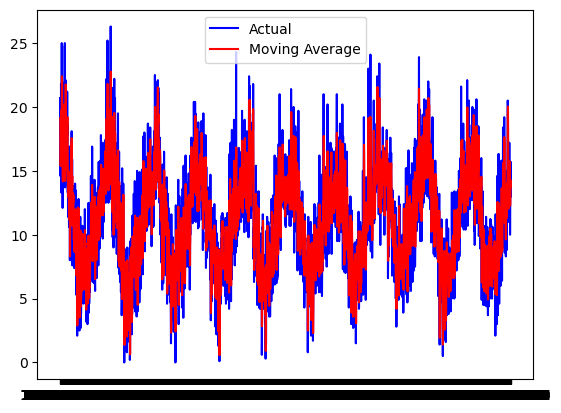

In [13]:
import matplotlib.pyplot as plt

plt.plot(weather, c = 'blue', label = "Actual")
plt.plot(moving_avg, c = 'red', label = "Moving Average")
plt.legend()

# Task 2 :

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [17]:
decomposition = seasonal_decompose(weather, period = 12)
decomposition

In [18]:
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

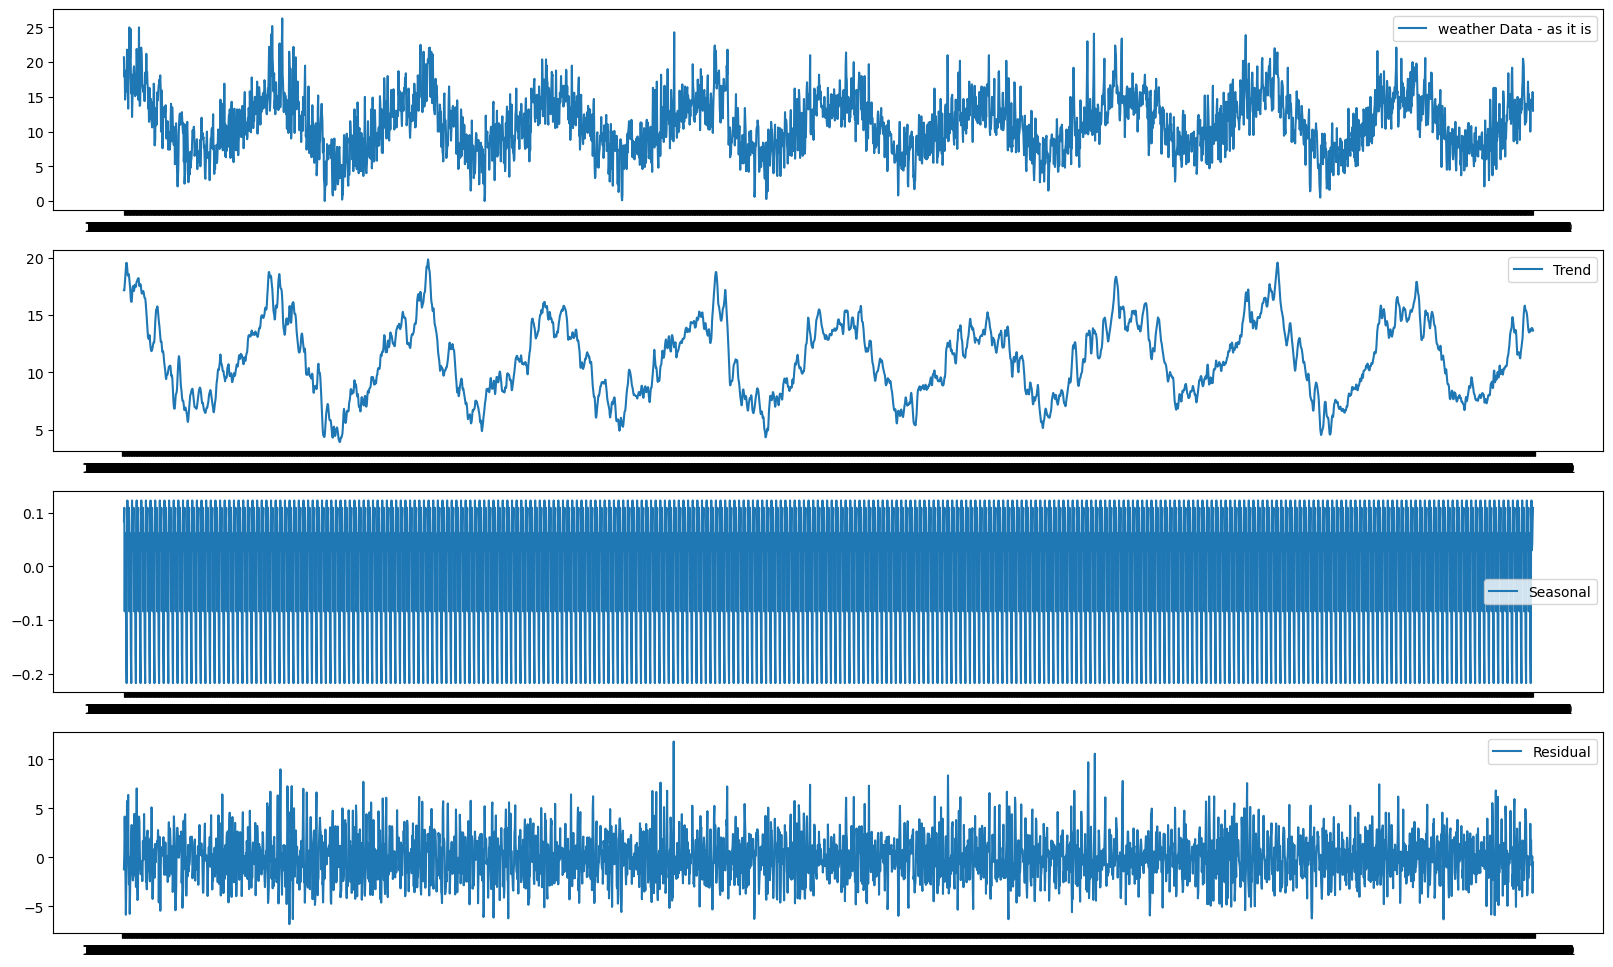

In [20]:
# plotting all the 4 graph
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(weather,label='weather Data - as it is')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best') 

# Task 3

In [23]:
from statsmodels.tsa.stattools import adfuller

def checkStationarity(data):
    pvalue = adfuller(data["Temp"])[1]
    print(pvalue)
    if pvalue < 0.05 :
        msg = "pvalue = {}. Data is stationary. Proceed to model building".format(pvalue)
    else :
        msg = "pvalue = {}. Data is not stationary. Make the data stationary before model building"
    return msg

In [24]:
print(checkStationarity(weather))

0.0002470826300361156
pvalue = 0.0002470826300361156. Data is stationary. Proceed to model building


# Task 4

## Simple Exp Smoothing

In [25]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [27]:
data = weather["Temp"]
data

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [28]:
def simplesmoothing(data, alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level = alpha)  # traing model
    pdct = model.fittedvalues ## forcasting values
    
    df = pd.DataFrame({'actual' : data, 'forecast' : pdct})
    return (model,df)

In [29]:
df = simplesmoothing(data, 0.5)
df

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x19fbe9dbd30>,
             actual   forecast
 Date                         
 1981-01-01    20.7  19.097523
 1981-01-02    17.9  19.898761
 1981-01-03    18.8  18.899381
 1981-01-04    14.6  18.849690
 1981-01-05    15.8  16.724845
 ...            ...        ...
 1990-12-27    14.0  13.498774
 1990-12-28    13.6  13.749387
 1990-12-29    13.5  13.674694
 1990-12-30    15.7  13.587347
 1990-12-31    13.0  14.643673
 
 [3650 rows x 2 columns])

In [31]:
alphas = [0,0.2, 0.6,0.8]

d_simple_exp = {}
models = []

In [32]:
for a in alphas:
    m,df = simplesmoothing(data, a)
    d_simple_exp[a] = df.forecast
    models.append(m)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

In [33]:
for i in range(len(alphas)):
    print(d_simple_exp[alphas[i]])

Date
1981-01-01    11.177753
1981-01-02    11.177753
1981-01-03    11.177753
1981-01-04    11.177753
1981-01-05    11.177753
                ...    
1990-12-27    11.177753
1990-12-28    11.177753
1990-12-29    11.177753
1990-12-30    11.177753
1990-12-31    11.177753
Name: forecast, Length: 3650, dtype: float64
Date
1981-01-01    17.992153
1981-01-02    18.533722
1981-01-03    18.406978
1981-01-04    18.485582
1981-01-05    17.708466
                ...    
1990-12-27    13.448916
1990-12-28    13.559133
1990-12-29    13.567306
1990-12-30    13.553845
1990-12-31    13.983076
Name: forecast, Length: 3650, dtype: float64
Date
1981-01-01    19.490548
1981-01-02    20.216219
1981-01-03    18.826488
1981-01-04    18.810595
1981-01-05    16.284238
                ...    
1990-12-27    13.695645
1990-12-28    13.878258
1990-12-29    13.711303
1990-12-30    13.584521
1990-12-31    14.853809
Name: forecast, Length: 3650, dtype: float64
Date
1981-01-01    20.144348
1981-01-02    20.588870
1981-

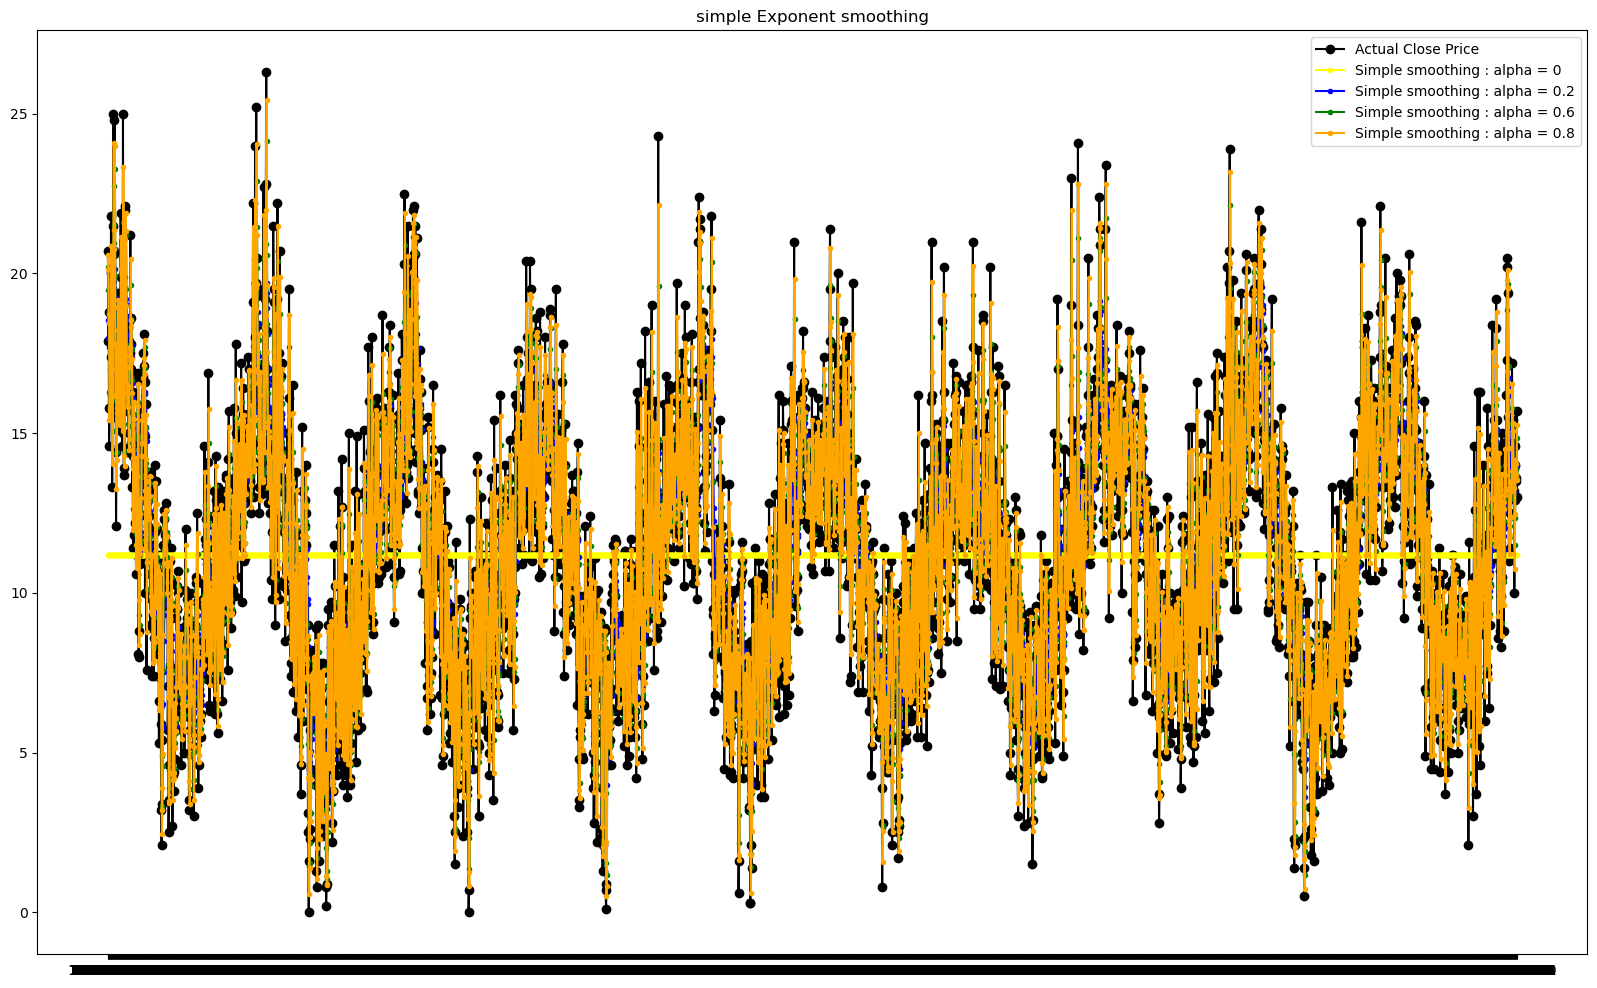

In [34]:
colors = ['yellow', 'blue', 'green', 'orange']

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker = 'o', color = 'black', label = "Actual Close Price")


for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]], marker = '.', color = colors[i], label = 'Simple smoothing : alpha = ' +str(alphas[i]))
  
plt.title('simple Exponent smoothing')
plt.legend()
plt.show()

### DOUBLE EXPONENT SMOOTHING --> TREND & LEVEL

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing

In [36]:
alpha = 0.25 ; beta = 0.45 # Random value

In [37]:
model2 = ExponentialSmoothing(data, trend = 'additive').fit(smoothing_level = alpha, smoothing_trend = beta)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
f_dexp = model2.fittedvalues
print(f_dexp)

Date
1981-01-01    17.064262
1981-01-02    17.708840
1981-01-03    17.513778
1981-01-04    17.737182
1981-01-05    16.501803
                ...    
1990-12-27    13.031525
1990-12-28    13.099929
1990-12-29    13.107490
1990-12-30    13.132318
1990-12-31    13.989803
Length: 3650, dtype: float64


In [39]:
print(model2.forecast(12))

3650    13.846564
3651    13.950776
3652    14.054988
3653    14.159200
3654    14.263412
3655    14.367624
3656    14.471836
3657    14.576048
3658    14.680260
3659    14.784472
3660    14.888684
3661    14.992896
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'DOUBLE EXPONENT SMOOTHING')

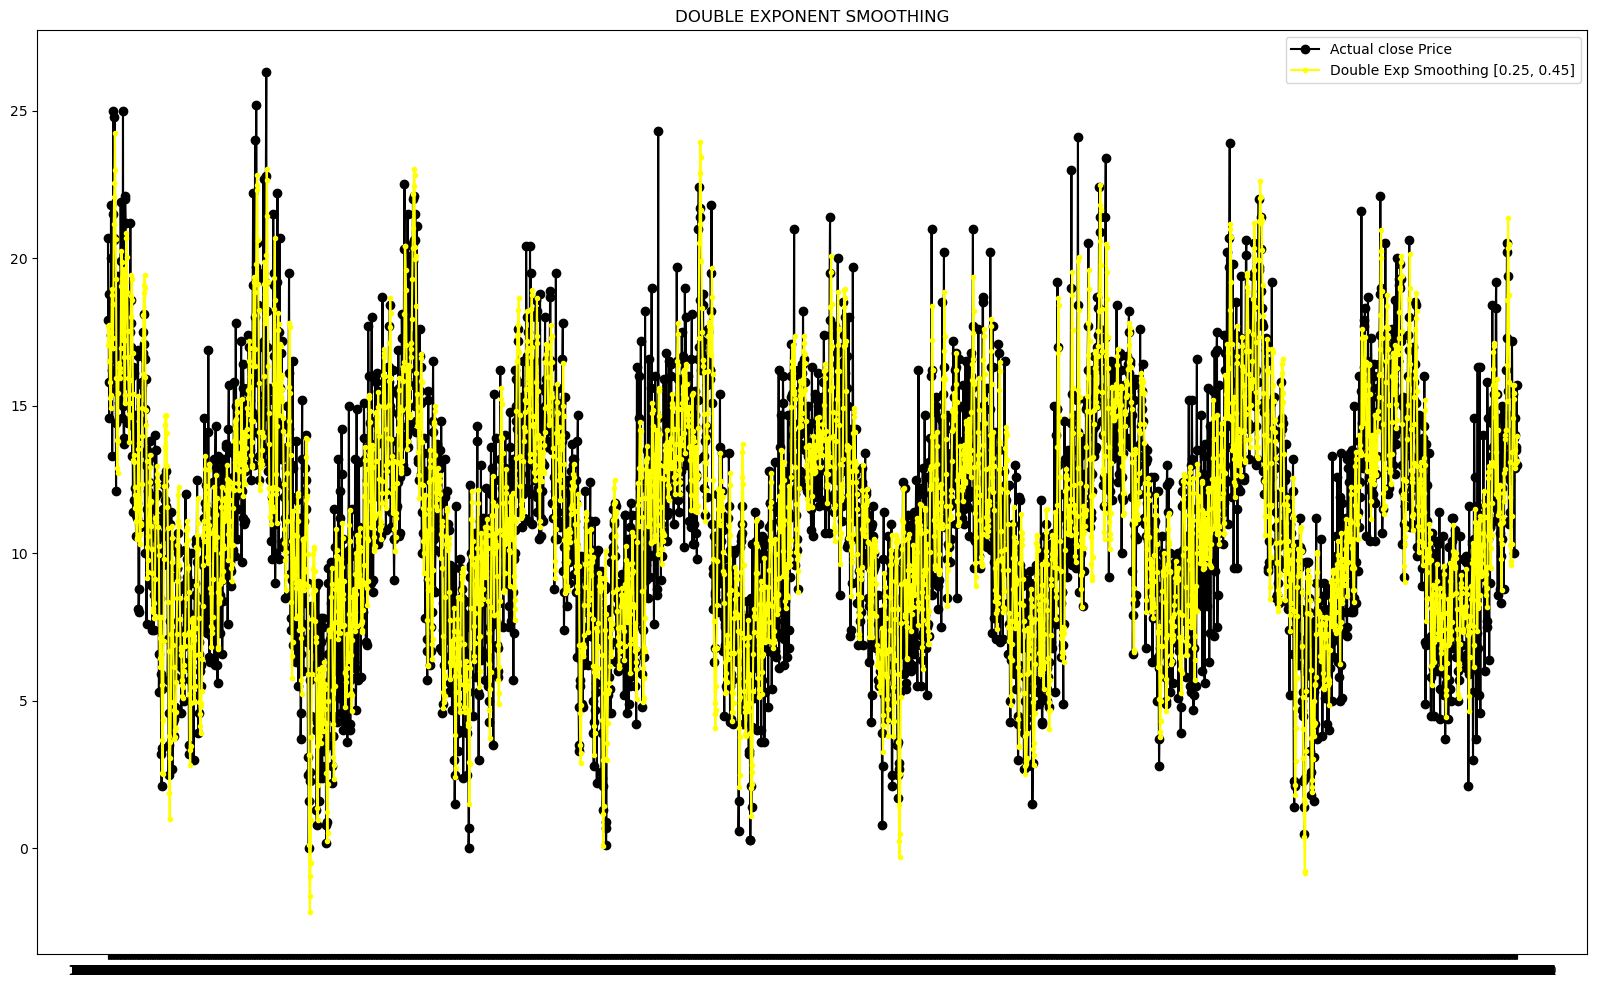

In [50]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker = 'o', color = 'black', label = 'Actual close Price')
plt.plot(f_dexp, marker = '.', color = 'yellow', label = 'Double Exp Smoothing [0.25, 0.45]')
plt.legend()
plt.title("DOUBLE EXPONENT SMOOTHING")

## Triple Exponent Smoothing (trend and seasonality)

In [44]:
data.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [42]:
alpha = 0.37; beta = 0.5; gamma = 0.15

In [45]:
model3 = ExponentialSmoothing(data, trend= 'add', seasonal='add', seasonal_periods=12).fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
predicted_model3 = model3.fittedvalues

In [47]:
model3.forecast(12)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3650    11.123667
3651     8.759226
3652     7.793151
3653     6.952554
3654     6.576506
3655     6.519246
3656     6.932870
3657     8.444618
3658     7.901435
3659     8.004653
3660     8.992248
3661     6.750429
dtype: float64

Text(0.5, 1.0, 'Triple Exponent Smoothing')

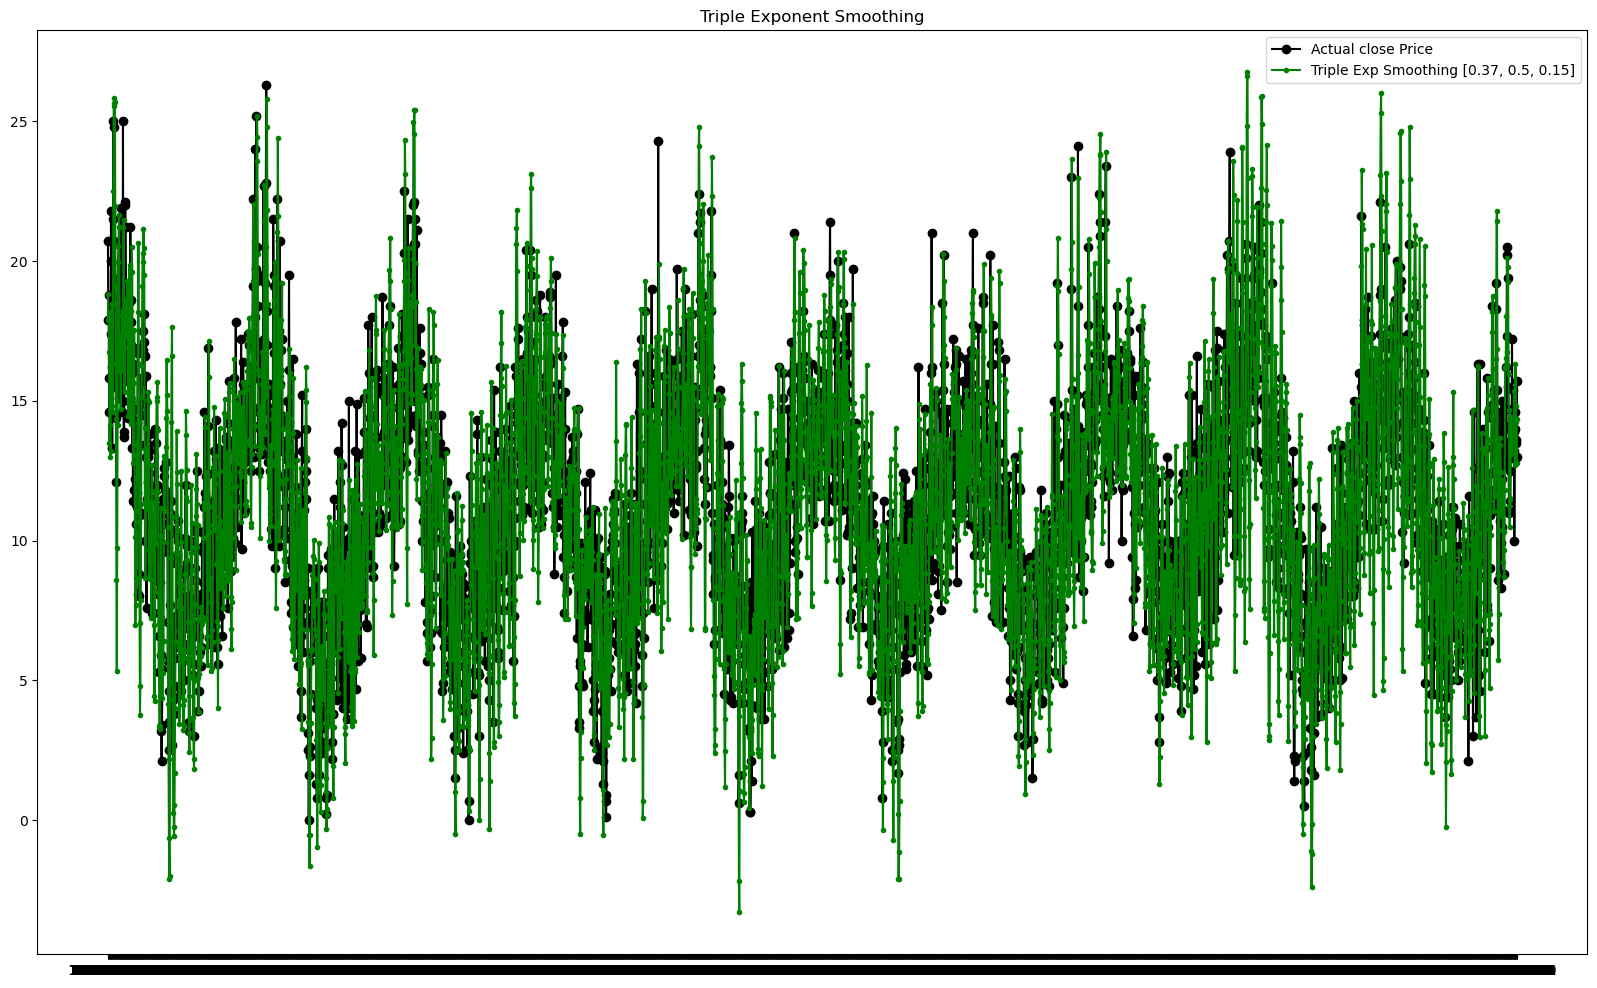

In [51]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker = 'o', color = 'black', label = 'Actual close Price')
plt.plot(predicted_model3, marker = '.', color = 'green', label = 'Triple Exp Smoothing [0.37, 0.5, 0.15]')
plt.legend()
plt.title("Triple Exponent Smoothing")

# Interpretation

Compared to simple and double exponential smoothing methods, which only model trend or trend and seasonality respectively, triple exponential smoothing provides a more robust and accurate forecast by taking into account multiple components of the data.